# Chapter 8: Statistical Tests

In [9]:
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency



## Test With Numeric Data

In [10]:
admission = pd.read_csv('../data/admission.csv')

In [11]:
admission.head()

,GPA,GMAT,De
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit


In [12]:
admission.std()['GMAT'], admission.mean()['GMAT'], admission.quantile(.75)['GMAT']

/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/2814391968.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  admission.std()['GMAT'], admission.mean()['GMAT'], admission.quantile(.75)['GMAT']


(81.52234661244044, 488.4470588235294, 538.0)

In [13]:
def p_2tail(sampdist,tstat):
    hyp = np.mean(sampdist)
    cutoff1 = hyp - np.abs(hyp - tstat)
    cutoff2 = hyp + np.abs(hyp - tstat)
    
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r')
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g')
    plt.show()
    
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist)
    return pvalue

***Mean***

/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/2521001947.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1 = np.random.normal(size=sampsize, loc=510, scale=admission.std()['GMAT'])
/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/2521001947.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tstat = admission.mean()['GMAT']


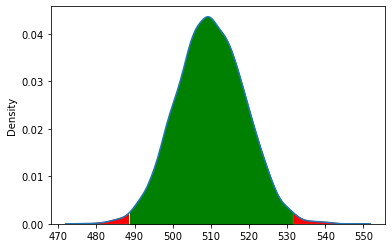

0.014

In [14]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=510, scale=admission.std()['GMAT'])
    return np.mean(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.mean()['GMAT']
p_2tail(sampdist,tstat)

***Standard Deviation***

/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/2383123660.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu = admission.mean()['GMAT']
/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/2383123660.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tstat = admission.std()['GMAT']


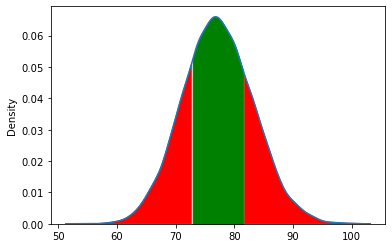

0.4737

In [15]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    mu = admission.mean()['GMAT']
    s1 = np.random.normal(size=sampsize, loc=mu, scale=78)
    return np.std(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.std()['GMAT']
p_2tail(sampdist,tstat)

***Median***

/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/3034076394.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1 = np.random.normal(size=sampsize, loc=500, scale=admission.std()['GMAT'])
/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/3034076394.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tstat = admission.median()['GMAT']


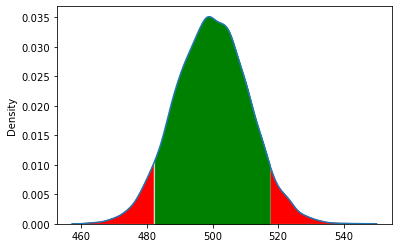

0.1043

In [16]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=500, scale=admission.std()['GMAT'])
    return np.median(s1)
sampdist = [f1() for _ in range(10000)]
tstat = admission.median()['GMAT']
p_2tail(sampdist,tstat)

***Percentile***

In [20]:
norm.ppf(0.75)

0.6744897501960817

In [21]:
newm = 600 - (norm.ppf(0.75) * admission.std()['GMAT'])
print(newm)

545.0140127979766


/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/121894670.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newm = 600 - (norm.ppf(0.75) * admission.std()['GMAT'])


In [22]:
norm.ppf(q=0.75, loc = newm, scale = admission.std()['GMAT'])

/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/2611755875.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm.ppf(q=0.75, loc = newm, scale = admission.std()['GMAT'])


600.0

/var/folders/j_/122h77c562dczctc6d7kv9mc0000gr/T/ipykernel_84394/2063921997.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1 = np.random.normal(size=sampsize, loc=newm, scale=admission.std()['GMAT'])


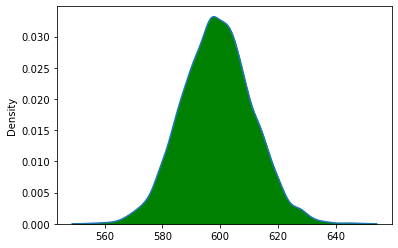

0.0

In [23]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=newm, scale=admission.std()['GMAT'])
    return np.quantile(s1, 0.75)
sampdist = [f1() for _ in range(10000)]
tstat = admission.quantile(.75)['GMAT']
p_2tail(sampdist,tstat)

***Normality Test***

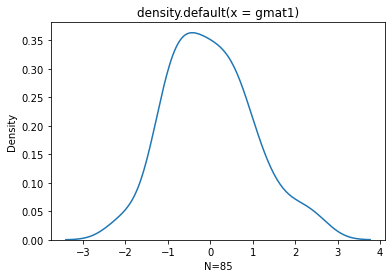

In [30]:
from sklearn.preprocessing import scale

gmat1 = scale(admission['GMAT'])
sns.kdeplot(gmat1)
plt.xlabel('N=85')
plt.ylabel('Density')
plt.title('density.default(x = gmat1)')
plt.show()

Let's plot a normal distribution for the comparision with the distribution of the sample:

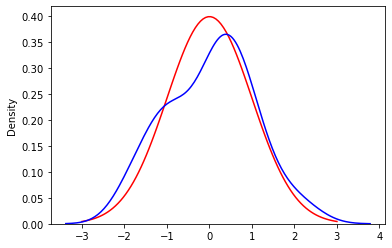

In [31]:
np.random.seed(87654321)
x = np.linspace(-3, 3, 100)

fig, axs = plt.subplots(1, 1)
axs.plot(x, norm.pdf(x, loc = 0, scale = 1), color='r')
s1 = np.random.normal(size=50, loc=0, scale=1)
sns.kdeplot(s1, color='b', ax=axs)
plt.show()

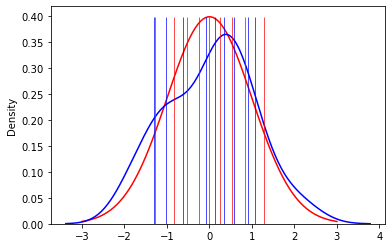

In [32]:
quantiles = np.arange(0.1, 1, 0.1) # stop value "1" is excluded
qvaluespop = norm.ppf(quantiles, loc = 0, scale = 1)
plt.plot(x, norm.pdf(x, loc = 0, scale = 1), color='r')
sns.kdeplot(s1, color='b')

plt.vlines(x=qvaluespop, ymin=0, ymax=np.max(norm.pdf(x=qvaluespop, loc=0, scale=1)), color='r', linewidth=0.7)
qvaluessamp = np.quantile(s1, q=quantiles)
plt.vlines(x=qvaluessamp, ymin=0, ymax=np.max(norm.pdf(x=norm.ppf(quantiles, loc=0, scale=1), loc=0, scale=1)), color='b', linewidth=0.7)

[-1.282 -0.842 -0.524 -0.253  0.     0.253  0.524  0.842  1.282]
[-1.311 -1.014 -0.622 -0.09   0.136  0.351  0.574  0.912  1.066]


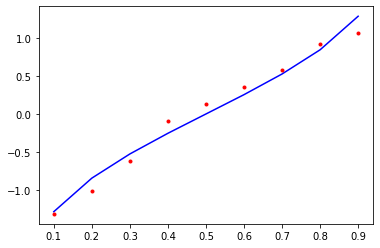

0.11460909048249418


In [33]:
print(np.round(qvaluespop,3))
print(np.round(qvaluessamp,3))
plt.plot(quantiles, qvaluespop, 'b-')
plt.plot(quantiles, qvaluessamp, 'r.')
plt.show()
normmetric = np.mean(np.abs(qvaluespop-qvaluessamp))
print(normmetric)

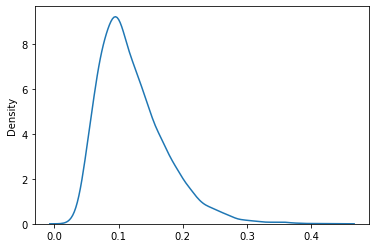

In [34]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    k1 = np.random.normal(size=sampsize, loc=0, scale=1)
    quantiles = np.arange(0.1, 1, 0.1) # stop value "1" is excluded
    qvaluespop = norm.ppf(quantiles, loc = 0, scale = 1)
    qvaluessamp = np.quantile(k1, q=quantiles)
    normmetric = np.mean(np.abs(qvaluespop-qvaluessamp))
    return(normmetric)
sampdist = [f1() for _ in range(10000)]
sns.kdeplot(sampdist)
plt.show()


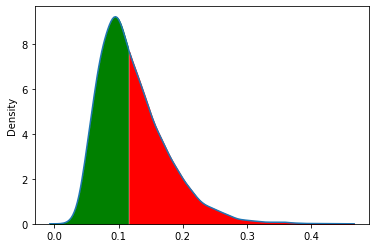

0.5259

In [35]:
def p_rtail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = x > tstat, color='r')
    plt.fill_between(x,y, where = x <= tstat, color='g')
    plt.show()
    
    pvalue = np.sum(sampdist < tstat) / len(sampdist)
    return pvalue

tstat = np.mean(np.abs(qvaluespop-qvaluessamp))
p_rtail(sampdist,tstat)


***Inbuilt Functions***

In [19]:
stats.ttest_1samp(admission['GMAT'], 510)

Ttest_1sampResult(statistic=-2.437470308681791, pvalue=0.016900399714406815)

In [20]:
stats.shapiro(admission['GMAT'])

ShapiroResult(statistic=0.9803898930549622, pvalue=0.22274158895015717)

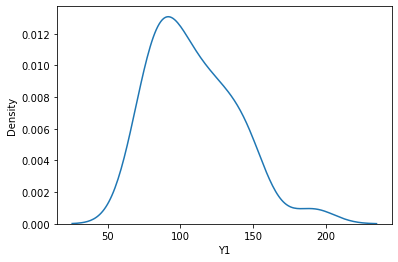

ShapiroResult(statistic=0.9297280311584473, pvalue=0.04829331114888191)

In [21]:
Immer = pd.read_csv("../data/immer.csv")
sns.kdeplot(Immer['Y1'])
plt.show()
stats.shapiro(Immer['Y1'])


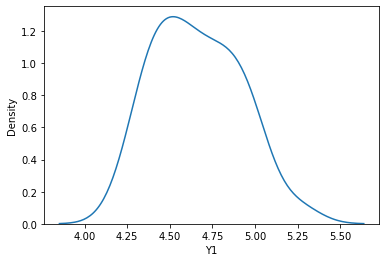

ShapiroResult(statistic=0.9653836488723755, pvalue=0.42168083786964417)

In [22]:
y = np.log(Immer['Y1'])
sns.kdeplot(y)
plt.show()
stats.shapiro(y)

***Tests With Factor/Categorical Data***

In [23]:
admitdomain = ['admit', 'other']
admitprob = [.4, .6]
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    k1 = np.random.choice(admitdomain, size=sampsize, p=admitprob)
    return(np.mean(k1 == 'admit'))
sampdist = [f1() for _ in range(10000)]

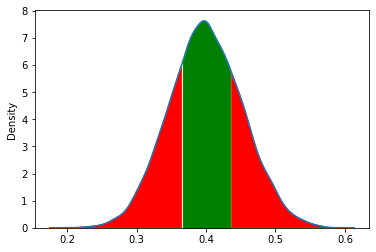

0.4379

In [24]:
tstat = np.mean(admission['De'] == 'admit')
p_2tail(sampdist,tstat)

***Tests With Two Numeric Variables***

In [25]:
def scale(x):
    return(x - np.mean(x)) / np.std(x)  # alternatively use sklearn.preprocessing.scale

gmat1 = scale(admission['GMAT'])
gpa1 = scale(admission['GPA'])
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    k1 = np.random.normal(size=sampsize, loc=0, scale=1)
    k2 = np.random.normal(size=sampsize, loc=0, scale=1)
    return(np.corrcoef(k1, k2)[0,1])

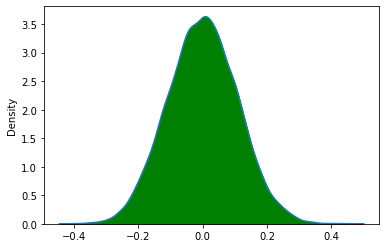

0.0

In [26]:
sampdist = [f1() for _ in range(10000)]
tstat = np.corrcoef(gmat1, gpa1)[0,1]
p_2tail(sampdist,tstat)

In [27]:
from scipy.stats import pearsonr
print("p-value: {}, sample estimate: {}".format(pearsonr(gmat1, gpa1)[1], pearsonr(gmat1, gpa1)[0]))


p-value: 9.16455058014374e-06, sample estimate: 0.4606331976247068


In [28]:
M = np.array([0,0])
S = np.array([[1,0.5],[0.5,1]])
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    x = np.random.multivariate_normal(mean=M, cov=S, size=sampsize)
    return(np.corrcoef(x[:,0], x[:,1])[0,1])
sampdist = [f1() for _ in range(10000)]

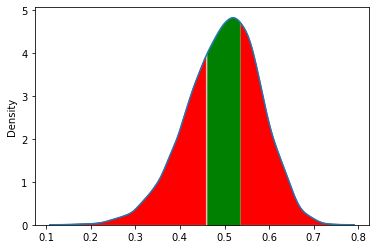

0.661

In [29]:
tstat = np.corrcoef(gmat1, gpa1)[0,1]
p_2tail(sampdist,tstat)

***Tests With Two Factor/Categorical Variables***

In [30]:
survey = pd.read_csv("../data/survey.csv")

In [31]:
distexer = survey.Exer.value_counts() / survey.Exer.count()
distsmoke = survey.Smoke.value_counts() / survey.Smoke.count()
print(distexer)
print(distsmoke)


Freq    0.485232
Some    0.413502
None    0.101266
Name: Exer, dtype: float64
Never    0.800847
Occas    0.080508
Regul    0.072034
Heavy    0.046610
Name: Smoke, dtype: float64


Pandas series must first be converted to numpy arrays and reshaped to be 2D row and column vectors before they can be used in the multiplication.
To print the resulting matrix is converted back to a data frame and index and columns are added.

In [32]:
# Reshape series into column and row vectors
distexer_colarr = distexer.values.reshape(3,1)
distsmoke_rowarr = distsmoke.values.reshape(1,4)

jointdist = distexer_colarr.dot(distsmoke_rowarr)
jointdist = pd.DataFrame(jointdist, index=distexer.index, columns=distsmoke.index).round(3)

In [33]:
n = len(survey)
E = n * jointdist
E.round(1)

,Never,Occas,Regul,Heavy
Freq,92.2,9.2,8.3,5.5
Some,78.4,7.8,7.1,4.5
None,19.2,1.9,1.7,1.2


In [34]:
np.random.seed(87654321)
o1 = np.random.choice(['Freq', 'None','Some'], size=n, replace=True, p=distexer)
o2 = np.random.choice(['Never', 'Occas','Regul', 'Heavy'], size=n, replace=True, p=distsmoke)
O = pd.crosstab(o1, o2)
O

col_0,Heavy,Never,Occas,Regul
row_0,,,,
Freq,3,94,7,7
None,6,70,8,10
Some,0,28,3,1


We need to reindex the joint distribution to match the index of the cross-tabulation

In [35]:
# Calculate chi squared statistic
O = O.reindex(['Never', 'Occas', 'Regul', 'Heavy'], axis=1)
np.sum((O.values - E.values)**2 / E.values)

10.59631452129426

In [37]:
sampsize = len(survey)
def f1():
    o1 = np.random.choice(['Freq', 'None','Some'], size=sampsize, replace=True, p=distexer)
    o2 = np.random.choice(['Never', 'Occas','Regul', 'Heavy'], size=sampsize, replace=True, p=distsmoke)
    O = pd.crosstab(o1, o2)
    O = O.reindex(['Never', 'Occas', 'Regul', 'Heavy'], axis=1)
    return(np.sum((O.values - E.values)**2 / E.values))
sampdist = [f1() for _ in range(10000)]

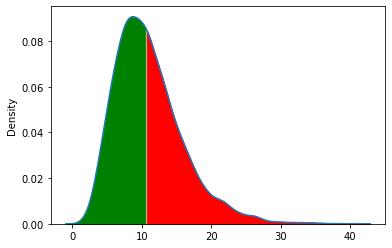

0.5319

In [38]:
# R:
# O = table(survey$Exer,survey$Smoke)
# tstat = sum(((O-E)^2)/E)
# p_rtail(sampdist,tstat)
# Python: 
tstat = np.sum(((O.values - E.values)**2 / E.values))
p_rtail(sampdist,tstat)

In [52]:
chi2, p, df, expected = chi2_contingency(O.values)
print("chi2: {}, p: {}, df: {}".format(chi2, p, df))

chi2: 6.779046167177817, p: 0.3417652182907054, df: 6


In [54]:
def f1():
    o1 = np.random.choice(['Freq', 'None','Some'], size=sampsize, replace=True, p=distexer)
    o2 = np.random.choice(['Heavy', 'Never', 'Occas','Regul'], size=sampsize, replace=True, p=distsmoke)
    O = pd.crosstab(o1, o2)
    O = O.reindex(['Never', 'Occas', 'Regul', 'Heavy'], axis=1)
    return(O.values[1,1]/E.values[1,1])
sampdist = [f1() for _ in range(10000)]



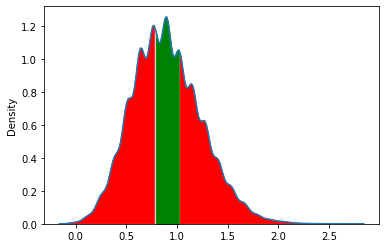

0.7202

In [56]:
# R:
# O = table(survey$Exer,survey$Smoke)
# tstat = O[1,1]/E[1,1]
# tstat
# p_rtail(sampdist,tstat)
# Python:
tstat = O.values[1,1]/E.values[1,1]
p_2tail(sampdist,tstat)
